In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

import numpy as np
import pandas as pd
import geopandas as gpd

import folium
from folium import plugins

from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns

In [100]:
df = pd.read_csv('bostoncrime.csv',encoding='ANSI')

In [101]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [102]:
df_copy = df.copy() #copy of dataset is created for the multiclass classification later
df_copy

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [103]:
a = df['OFFENSE_CODE_GROUP'].value_counts()

In [105]:
for c, name in zip(a,a.index):
    print("{:<40} {:<10}".format(name,c)) # Display all offence code groups

Motor Vehicle Accident Response          35342     
Larceny                                  24534     
Medical Assistance                       22351     
Investigate Person                       17867     
Other                                    17223     
Drug Violation                           15844     
Simple Assault                           15025     
Vandalism                                14741     
Verbal Disputes                          12370     
Towed                                    10656     
Investigate Property                     10562     
Larceny From Motor Vehicle               10276     
Property Lost                            9156      
Warrant Arrests                          7970      
Aggravated Assault                       7402      
Violations                               5854      
Fraud                                    5453      
Residential Burglary                     5402      
Missing Person Located                   4730      
Auto Theft  

In [106]:
serious = ['Motor Vehicle Accident Response',               
'Larceny',                                       
'Medical Assistance'  ,                          
'Vandalism',                                     
'Drug Violation' ,                               
'Larceny From Motor Vehicle' ,                    
'Aggravated Assault'   ,                          
'Residential Burglary' ,                          
'Fraud'                ,                          
'Auto Theft'    ,                                 
'Robbery'  ,                                      
'Missing Person Reported'   ,                     
'Fire Related Reports'   ,                        
'Firearm Violations' ,                            
'Commercial Burglary'  ,                          
'Ballistics'       ,                               
'Property Related Damage'  ,                       
'Firearm Discovery',                              
'Offenses Against Child / Family',                 
'Prisoner Related Incidents'   ,                   
'Prostitution'       ,                             
'Homicide'    ,                                    
'Criminal Harassment'  ,                           
'Arson'    ,                                        
'Bomb Hoax'  ,                                      
'Aircraft'  ,                                       
'Explosives'      ,                                 
'Manslaughter'   ,                                   
'Biological Threat'  ]     #Selecting which offence code groups will be grouped into serious crime

In [107]:
nonserious = ['Investigate Person  ',                          
'Other '         ,                               

'Simple Assault   '  ,                           

'Verbal Disputes  ' ,                            
'Towed  '         ,                              
'Investigate Property  '  ,                      

'Property Lost  ' ,                               
'Warrant Arrests '   ,                            



'Violations  '    ,                               
'Missing Person Located'  ,                   


'Harassment'  ,                                   
'Property Found'     ,                            
'Confidence Games '   ,                           
'Police Service Incidents '  ,                    
'Disorderly Conduct'     ,                        

'License Violation'  ,                            

'Restraining Order Violations  '  ,               
'Counterfeiting '    ,                            

'Recovered Stolen Property ' ,                    
'Auto Theft Recovery' ,                            
'Liquor Violation      ' ,                         
'Search Warrants   '   ,                           
'Landlord/Tenant Disputes    ' ,                   

'Assembly or Gathering Violations  ' ,             


'License Plate Related Incidents '  ,              

'Operating Under the Influence   ' ,               
'Other Burglary '   ,                              
'Evading Fare '   ,                                
'Embezzlement '  ,                                 
'Service       '   ,                               

'Harbor Related Incidents  ' ,                      


'Phone Call Complaints '  ,                         

'Gambling  '   ,                                     


'Burglary - No Property Taken '] #Selecting which offence code groups will be grouped into nonserious crime

In [108]:
serious = [i.strip() for i in serious]
nonserious = [i.strip() for i in nonserious]

In [109]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"


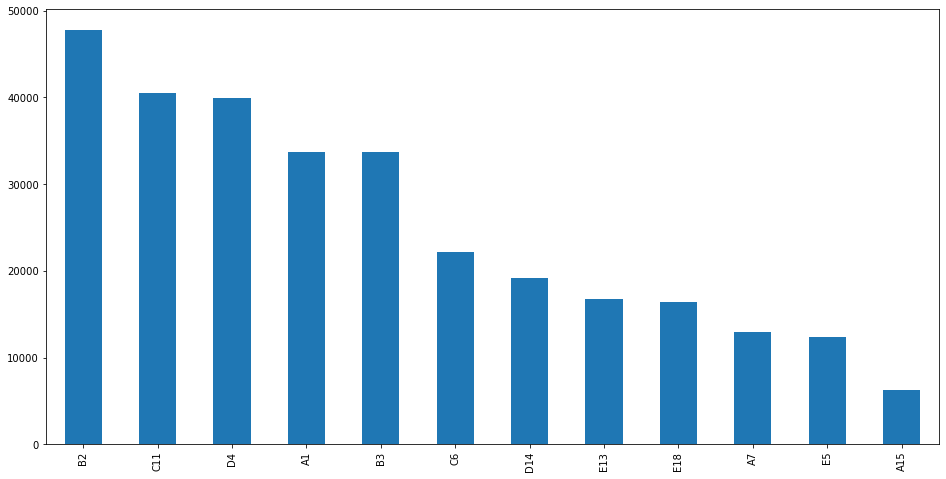

In [110]:
plt.figure(figsize=(16,8))
df['DISTRICT'].value_counts().plot.bar()
plt.show() #number of crimes in each district

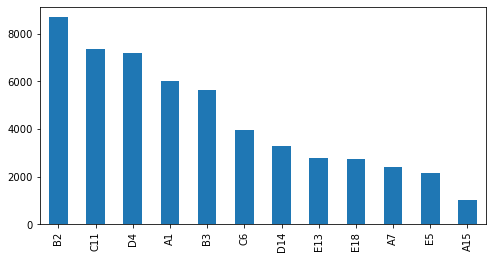

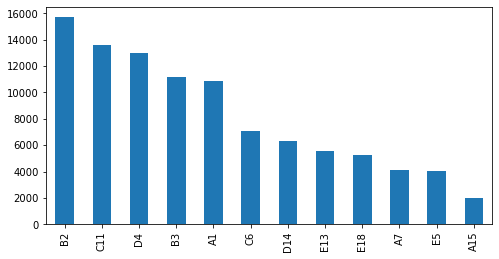

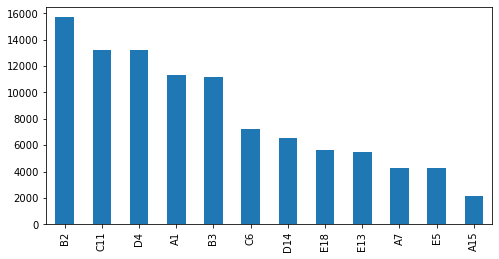

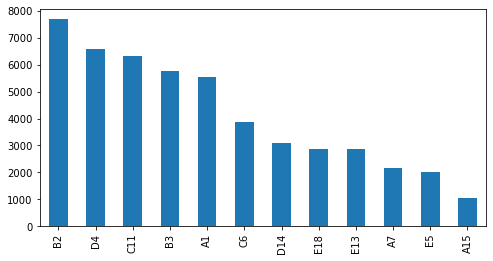

In [111]:
# 2015
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2015].value_counts().plot.bar()
plt.show()

# 2016
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2016].value_counts().plot.bar()
plt.show()

# 2017
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2017].value_counts().plot.bar()
plt.show()

# 2018
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2018].value_counts().plot.bar()
plt.show()

In [112]:
i = 1

while i < 13:
    print('== ' + str(i) + ' ==')
    print(df['DISTRICT'].loc[df['MONTH']==i].value_counts())
    i +=1
# A breakdown of how many crimes happen in each district per month

== 1 ==
B2     3793
C11    3219
D4     2922
B3     2668
A1     2550
C6     1743
D14    1432
E18    1331
E13    1299
A7     1036
E5     1008
A15     478
Name: DISTRICT, dtype: int64
== 2 ==
B2     3310
C11    2913
D4     2873
B3     2364
A1     2321
C6     1559
D14    1396
E18    1275
E13    1240
A7      950
E5      910
A15     438
Name: DISTRICT, dtype: int64
== 3 ==
B2     3987
C11    3170
D4     3126
B3     2671
A1     2581
C6     1893
D14    1458
E13    1302
E18    1297
E5     1019
A7      986
A15     504
Name: DISTRICT, dtype: int64
== 4 ==
B2     3895
C11    3194
D4     3119
B3     2722
A1     2572
C6     1835
D14    1402
E13    1357
E18    1298
A7     1082
E5      996
A15     472
Name: DISTRICT, dtype: int64
== 5 ==
B2     4046
C11    3573
D4     3396
B3     2987
A1     2881
C6     1801
D14    1732
E18    1451
E13    1446
A7     1102
E5     1049
A15     563
Name: DISTRICT, dtype: int64
== 6 ==
B2     4762
D4     4050
C11    3943
B3     3387
A1     3222
C6     2224
D14    1904
E18

In [113]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [114]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

In [115]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

In [116]:
list_unique_year, list_number_year = create_list_number_crime('YEAR',df['YEAR'].unique())

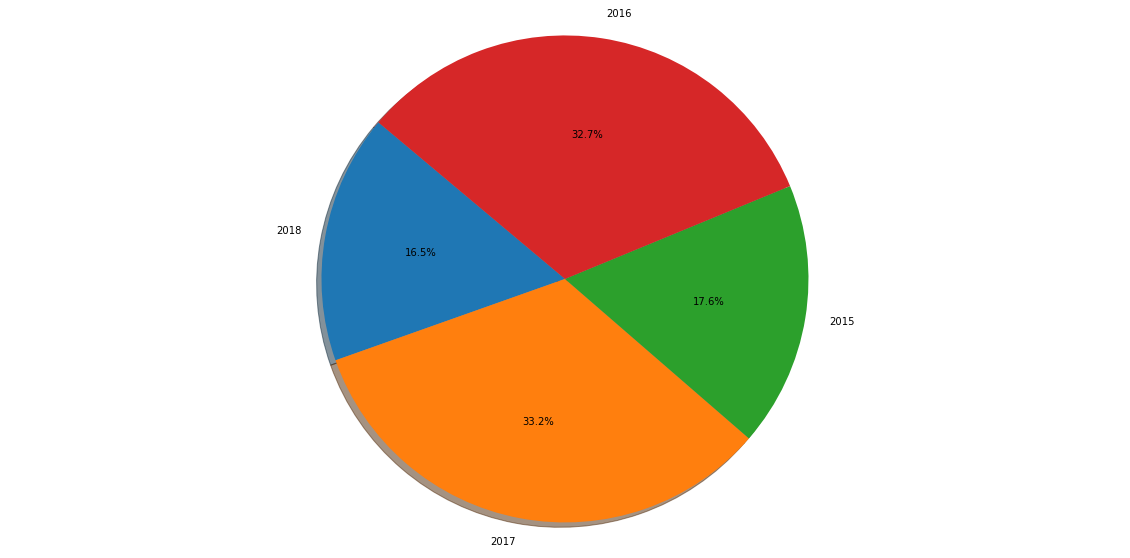

0

In [117]:
pie_plot(list_unique_year, list_number_year)

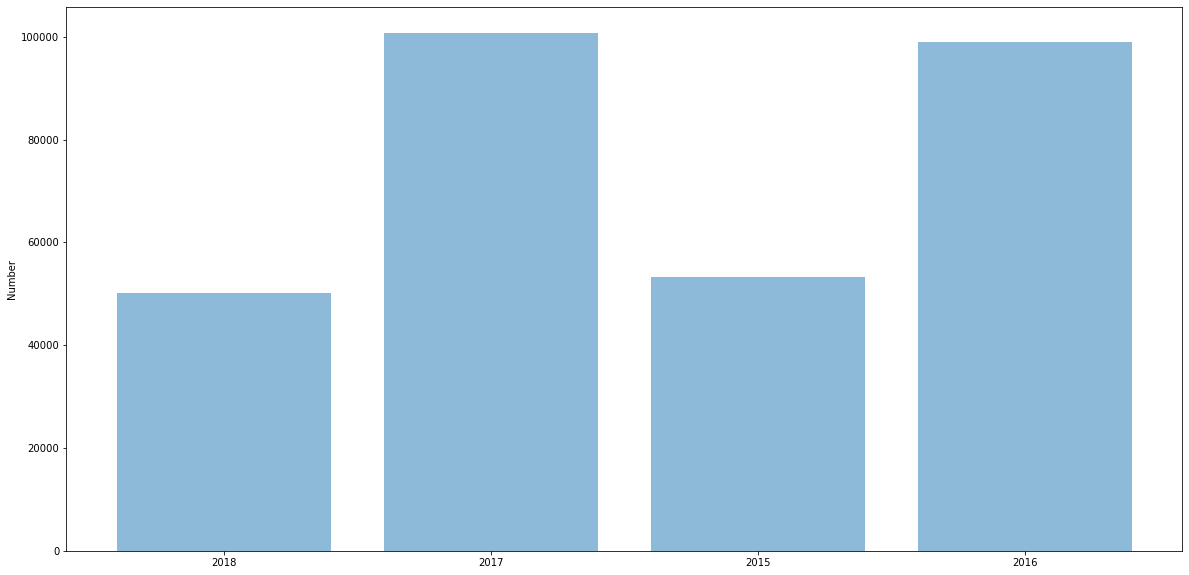

0

In [118]:
bar_chart(list_number_year,list_unique_year)

In [119]:
#Total number crime for each month
list_unique_month, list_number_month = create_list_number_crime('MONTH',list(range(1,13)))

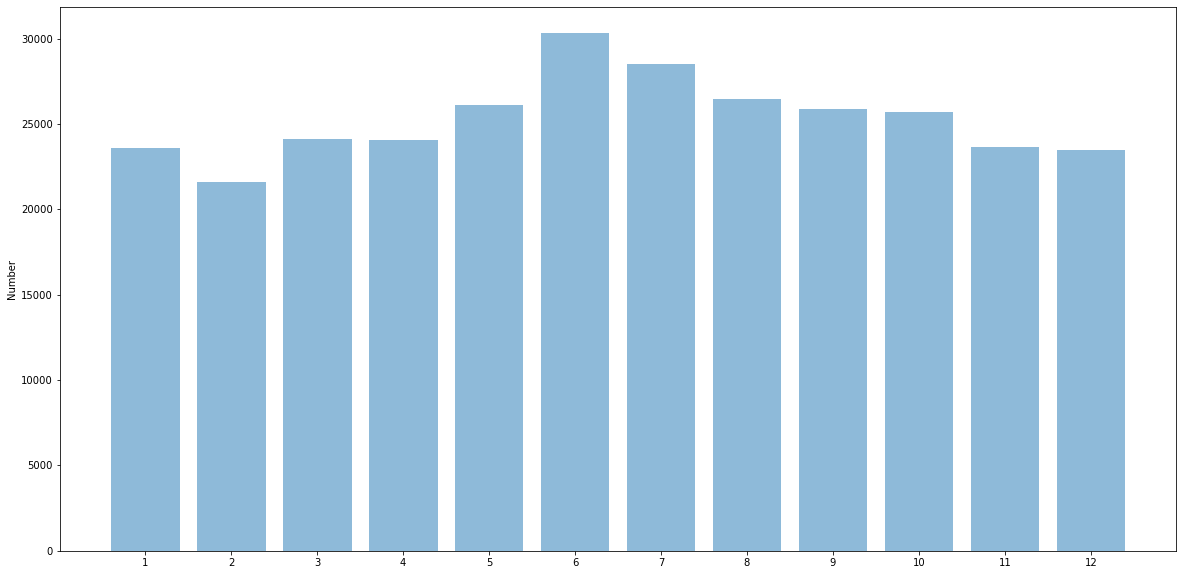

0

In [120]:
bar_chart(list_number_month,list_unique_month)

In [121]:
#Total number crime for each day of week
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

In [122]:
list_unique_day, list_number_day = create_list_number_crime('DAY_OF_WEEK',day_of_week)

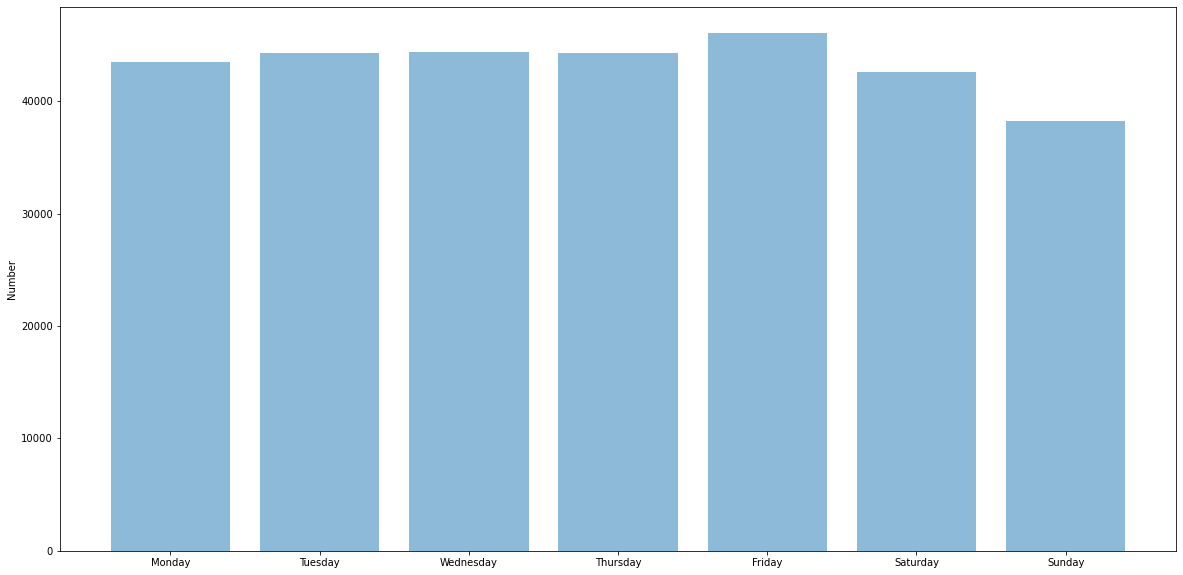

0

In [123]:
bar_chart(list_number_day,list_unique_day)

In [124]:
#Total number crime for each hour
list_unique_hour, list_number_hour = create_list_number_crime('HOUR',list(range(0,24)))

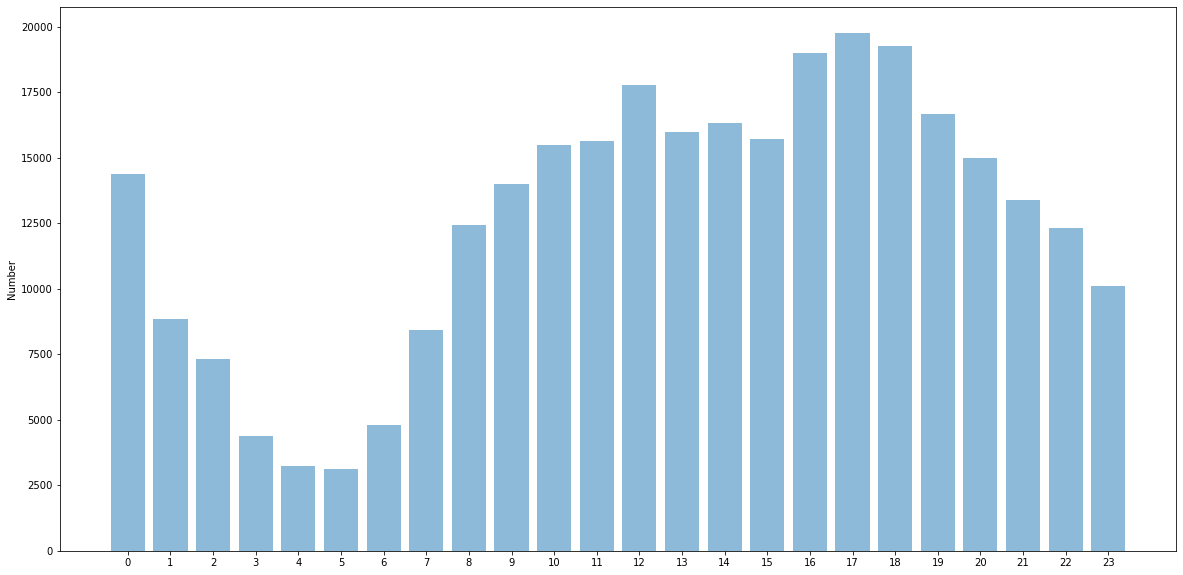

0

In [125]:
bar_chart(list_number_hour,list_unique_hour)

In [126]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [127]:
df[['Lat','Long']].describe()

,Lat,Long
count,284532.000000,284532.000000
mean,42.221680,-70.920017
std,2.085899,3.374111
min,-1.000000,-71.178674
25%,42.297521,-71.097131
50%,42.325538,-71.077497
75%,42.348624,-71.062492
max,42.395042,-1.000000


In [128]:
location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]  

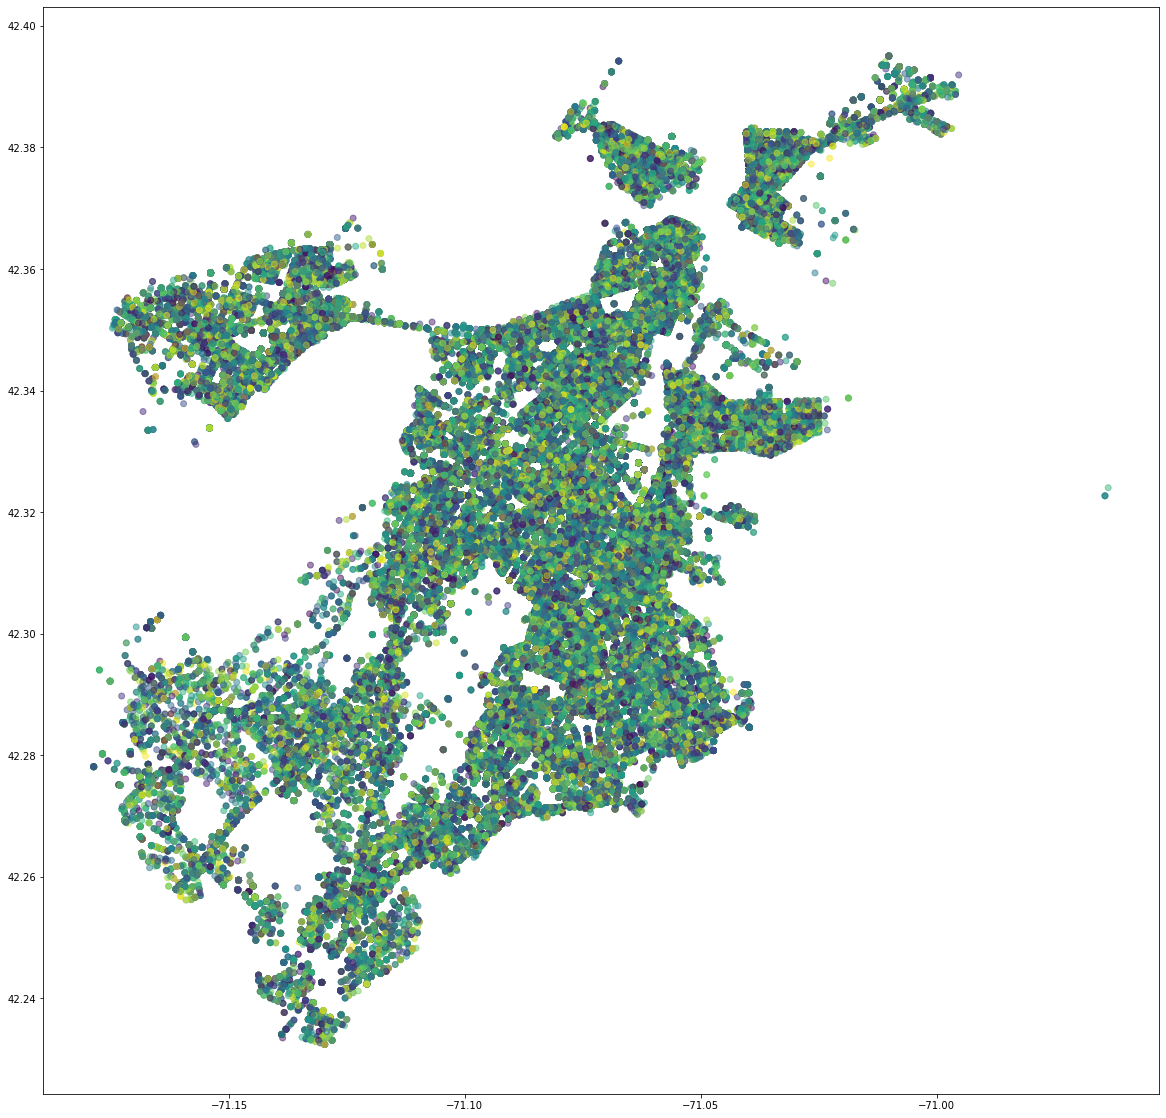

In [129]:
x = location['Long']
y = location['Lat']


colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [130]:
m = folium.Map([42.348624, -71.062492], zoom_start=11)
m

# Data Pre-processing
Here I begin pre-processing the Data

In [131]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [132]:
df['Target'] = df['OFFENSE_CODE_GROUP'].apply(lambda x: 1 if x in serious else 0)
# Creates a new column in dataset that contains data of whether crime is serious or nonserios

In [133]:
b = df.isna().sum()#Displays the number of null values in each column

In [134]:
b

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1643
REPORTING_AREA              0
SHOOTING               302402
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10618
Lat                     18839
Long                    18839
Location                    0
Target                      0
dtype: int64

In [135]:
th = len(df)*20/100 #variable that equals 20% of the length of the dataset

In [136]:
th

60674.2

In [137]:
col = b[b<=th].index # removing any column where more than 20% of values are null. Shooting column is removed

In [138]:
col

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location', 'Target'],
      dtype='object')

In [139]:
df = df[col]

In [140]:
list(col)

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location',
 'Target']

In [141]:
df['STREET'].value_counts() #There are 4595 different streets, so this will be removed from the data

WASHINGTON ST     13504
BLUE HILL AVE      7385
BOYLSTON ST        6873
DORCHESTER AVE     4907
TREMONT ST         4517
                  ...  
PROVIDENCE HWY        1
MISSION PK DR         1
ADAMS S               1
BARTLETT CRES         1
GREENHALGE ST         1
Name: STREET, Length: 4595, dtype: int64

In [142]:
col_rq = ['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'Target']

In [143]:
df = df[col_rq]

In [144]:
df

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,Target
0,3301,VERBAL DISPUTE,B3,428,2018,7,Tuesday,20,Part Three,42.282829,-71.091825,"(42.28282878, -71.09182490)",0
1,3114,INVESTIGATE PROPERTY,E18,481,2018,7,Tuesday,21,Part Three,42.266525,-71.098553,"(42.26652466, -71.09855320)",0
2,619,LARCENY ALL OTHERS,B2,182,2018,7,Tuesday,21,Part One,42.322496,-71.069092,"(42.32249601, -71.06909180)",1
3,617,LARCENY THEFT FROM BUILDING,E5,714,2018,7,Tuesday,18,Part One,42.262539,-71.165069,"(42.26253888, -71.16506913)",1
4,3410,TOWED MOTOR VEHICLE,C6,211,2018,7,Tuesday,20,Part Three,42.338964,-71.048964,"(42.33896439, -71.04896420)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,3125,WARRANT ARREST,D4,285,2016,6,Sunday,17,Part Three,42.336951,-71.085748,"(42.33695098, -71.08574813)",0
303367,111,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015,7,Thursday,13,Part One,42.255926,-71.123172,"(42.25592648, -71.12317207)",1
303368,3125,WARRANT ARREST,E18,520,2015,7,Thursday,13,Part Three,42.255926,-71.123172,"(42.25592648, -71.12317207)",0
303369,3125,WARRANT ARREST,E13,569,2016,5,Tuesday,19,Part Three,42.302333,-71.111565,"(42.30233307, -71.11156487)",0


In [145]:
list(df)

['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'Target']

In [146]:
df = pd.get_dummies(df,columns=['OFFENSE_DESCRIPTION','DISTRICT','DAY_OF_WEEK','UCR_PART']) #One hot encoding to convert to int

In [147]:
df.head() #result of one hot encoding shown

,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long,Location,Target,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,428,2018,7,20,42.282829,-71.091825,"(42.28282878, -71.09182490)",0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,481,2018,7,21,42.266525,-71.098553,"(42.26652466, -71.09855320)",0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,182,2018,7,21,42.322496,-71.069092,"(42.32249601, -71.06909180)",1,0,...,0,0,0,0,1,0,0,1,0,0
3,617,714,2018,7,18,42.262539,-71.165069,"(42.26253888, -71.16506913)",1,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,211,2018,7,20,42.338964,-71.048964,"(42.33896439, -71.04896420)",0,0,...,0,0,0,0,1,0,0,0,1,0


In [148]:
df.drop('Lat',axis=1,inplace=True) #Columns being dropped from dataset as they are not necessary for modelling

In [149]:
df.drop('Long',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)

In [150]:
df.drop('REPORTING_AREA',axis=1,inplace=True)

In [151]:
df.head() #You can see Lat, Long, Location, Reporting_Area columns have been removed

,OFFENSE_CODE,YEAR,MONTH,HOUR,Target,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,2018,7,21,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,617,2018,7,18,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [152]:
list(df.dtypes) #making sure all remaining columns are integers so model will be able to process data

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'

In [153]:
df.select_dtypes('object').shape # object = string, checking if there are any strings in the dataset but there are 0

(303371, 0)

In [154]:
X = df.drop('Target',axis=1) # X is being set to all features except for Target column

In [155]:
y = df['Target']

In [156]:
X.head()

,OFFENSE_CODE,YEAR,MONTH,HOUR,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,OFFENSE_DESCRIPTION_ANIMAL ABUSE,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
0,3301,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3114,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,619,2018,7,21,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,617,2018,7,18,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3410,2018,7,20,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [157]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Target, dtype: int64

# Build Binary Classification Model
The purpose of this Binary Classification model is to predict whether a crime based on the input information will be a serious or a non serious crime

In [158]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,shuffle=True)

In [159]:
X_test

,OFFENSE_CODE,YEAR,MONTH,HOUR,"OFFENSE_DESCRIPTION_A&B HANDS, FEET, ETC. - MED. ATTENTION REQ.",OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_AFFRAY,OFFENSE_DESCRIPTION_AIRCRAFT INCIDENTS,OFFENSE_DESCRIPTION_ANIMAL ABUSE,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_Other,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
16624,3115,2018,5,20,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
170450,617,2016,10,13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
94524,3201,2017,7,8,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
186680,3831,2016,8,18,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
76020,3831,2017,9,9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298857,3831,2015,6,17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
236472,3802,2016,2,15,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
227792,3503,2016,3,18,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
231228,3301,2016,3,20,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [161]:
lr = LogisticRegression()

In [162]:
lr.fit(X_train,y_train) # train model
y_pred = lr.predict(X_test) #predict

In [163]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
16624,0,0
170450,1,1
94524,0,0
186680,1,1
76020,1,1
...,...,...
298857,1,1
236472,1,1
227792,0,0
231228,0,0


In [164]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [165]:
accuracy_score(y_test,y_pred)

0.9728913676937885

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35294
           1       0.98      0.97      0.97     40549

    accuracy                           0.97     75843
   macro avg       0.97      0.97      0.97     75843
weighted avg       0.97      0.97      0.97     75843



In [167]:
confusion_matrix(y_test,y_pred)

array([[34317,   977],
       [ 1079, 39470]], dtype=int64)

In [168]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

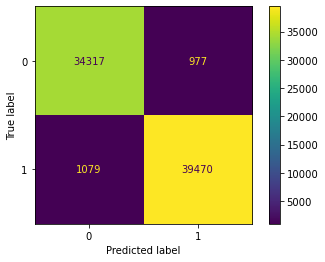

In [169]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show() # Visualisation of confusion matrix

Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [171]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) #train model
y_pred = dt.predict(X_test) #predict

In [172]:
accuracy_score(y_test,y_pred)

1.0

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35294
           1       1.00      1.00      1.00     40549

    accuracy                           1.00     75843
   macro avg       1.00      1.00      1.00     75843
weighted avg       1.00      1.00      1.00     75843



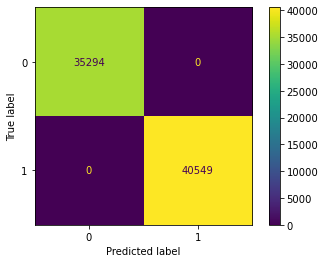

In [174]:
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

Random Forest Classifier

In [175]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train) # train model
y_pred = rf.predict(X_test) #predict

In [176]:
accuracy_score(y_test,y_pred)

0.9999472594702213

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35294
           1       1.00      1.00      1.00     40549

    accuracy                           1.00     75843
   macro avg       1.00      1.00      1.00     75843
weighted avg       1.00      1.00      1.00     75843



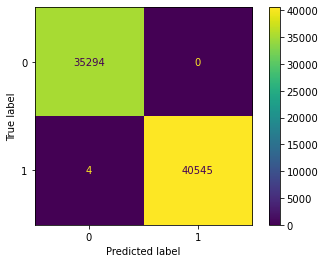

In [178]:
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

Neural Networks first attempt

In [179]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [180]:
nn_class = MLPClassifier(
                        solver='lbfgs',
                        alpha=1e-5, 
                        hidden_layer_sizes=(20),
                        random_state=1,
                        max_iter=1000
                        )

nn_class.fit(X_train, y_train)
y_pred = nn_class.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred)

0.5346439354983321

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35294
           1       0.53      1.00      0.70     40549

    accuracy                           0.53     75843
   macro avg       0.27      0.50      0.35     75843
weighted avg       0.29      0.53      0.37     75843



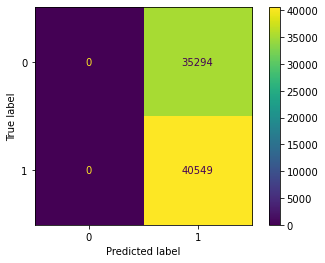

In [183]:
plot_confusion_matrix(nn_class, X_test, y_test)
plt.show()

Neural Networks improved attempt

In [184]:
from sklearn.model_selection import GridSearchCV
# https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [185]:
param_grid = {'solver': ['lbfgs'], 
 'max_iter': [1000,1100 ], # 1200,1300,1400,1500,1600,1700,1800,1900,2000
 'alpha': 10.0 ** -np.arange(1, 4), 
 'hidden_layer_sizes':np.arange(10, 15)
}

In [ ]:
CV_rfc = GridSearchCV(estimator=nn_class, param_grid=param_grid, cv= 5,n_jobs=-1,verbose=3)
CV_rfc.fit(X_train, y_train)
# Do not run this line of  code as this Grid search will search for the best parameters and I have already used it to find them
# This line of code took me more 6 hours to finish executing

In [ ]:
CV_rfc.best_params_
# This line of code is meant to be run after the Grid Search to display best parameters

In [186]:
nn_class = MLPClassifier(
                        solver='lbfgs',
                        alpha=0.001, 
                        hidden_layer_sizes=(13),
                        random_state=1,
                        max_iter=1100
                        )
# Best Parameters from grid search have been inputted
nn_class.fit(X_train, y_train)
y_pred = nn_class.predict(X_test)

In [187]:
accuracy_score(y_test,y_pred)

0.9426842292630829

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     35294
           1       0.95      0.94      0.95     40549

    accuracy                           0.94     75843
   macro avg       0.94      0.94      0.94     75843
weighted avg       0.94      0.94      0.94     75843



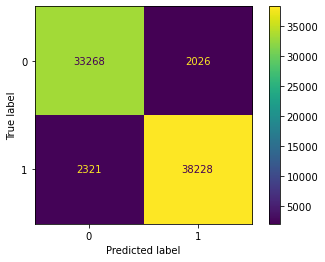

In [189]:
plot_confusion_matrix(nn_class, X_test, y_test)
plt.show()

# Build multiclass classification model
The purpose of this Binary Classification model is to predict what offence type a crime will bebased on the input information

# Preprocessing 

In [190]:
df_copy # The copy of the dataset will be used for multiclass classification

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303366,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
303367,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303368,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
303369,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


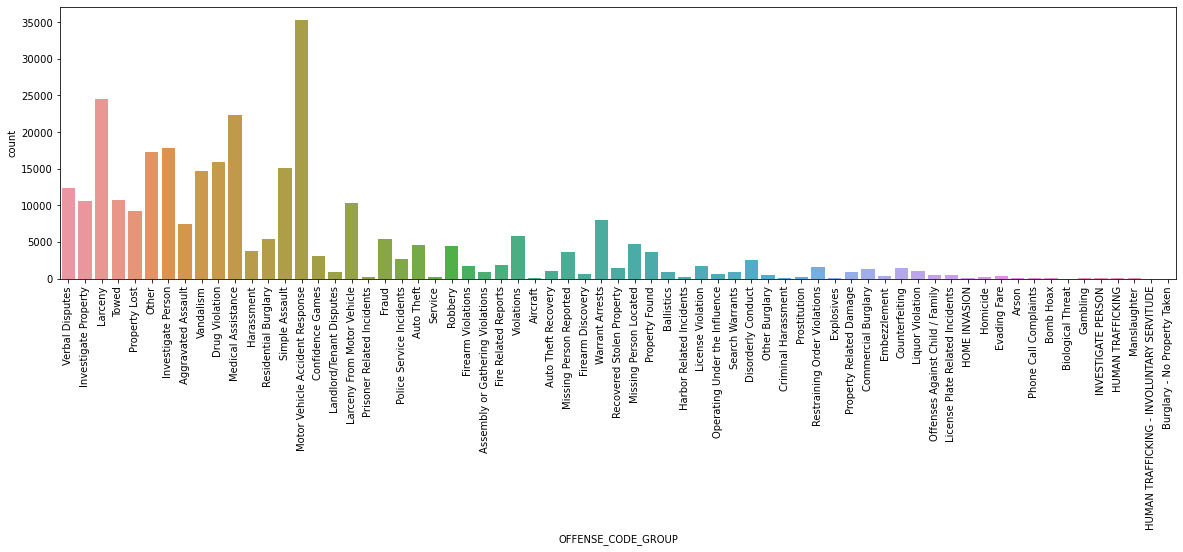

In [191]:
plt.figure(figsize=(20,5))
sns.countplot(df_copy['OFFENSE_CODE_GROUP'])
_ = plt.xticks(rotation=90)

In [192]:
for c, name in zip(a,a.index):
    print("{:<40} {:<10}".format(name,c))

Motor Vehicle Accident Response          35342     
Larceny                                  24534     
Medical Assistance                       22351     
Investigate Person                       17867     
Other                                    17223     
Drug Violation                           15844     
Simple Assault                           15025     
Vandalism                                14741     
Verbal Disputes                          12370     
Towed                                    10656     
Investigate Property                     10562     
Larceny From Motor Vehicle               10276     
Property Lost                            9156      
Warrant Arrests                          7970      
Aggravated Assault                       7402      
Violations                               5854      
Fraud                                    5453      
Residential Burglary                     5402      
Missing Person Located                   4730      
Auto Theft  

In [194]:
len(df_copy.columns) #number of columns

17

In [195]:
df_model = pd.DataFrame([],columns=df_copy.columns)
df_model.loc[len(df_model)] = list(range(17))

In [198]:
df_model1 = pd.DataFrame([],columns=df_copy.columns)
df_model1.loc[len(df_model1)] = list(range(17))#Creating an empty table

In [199]:
df_model1.append(df_model)#failed attempt at creating dataset with only 12 most common crime types

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


In [200]:
a.index[:12]#I want to look at the top 12 most common type of offence groups

Index(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'],
      dtype='object')

In [201]:
df_model = pd.DataFrame([],columns=df_copy.columns)
for crime in a.index[:12]:
    crime_df = df_copy[df_copy['OFFENSE_CODE_GROUP']==crime]
    df_model = df_model.append(crime_df) #successful attempt at creating dataset with only 12 most common crime types

In [203]:
df_model

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
41,I182054327,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,311,NaN,2018-07-10 18:51:00,2018,7,Tuesday,18,Part Three,WARREN ST,42.319408,-71.081405,"(42.31940816, -71.08140505)"
43,I182054325,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E13,610,NaN,2018-06-30 12:00:00,2018,6,Saturday,12,Part Three,ZAMORA ST,42.322067,-71.112965,"(42.32206713, -71.11296494)"
46,I182054322,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B3,416,NaN,2018-07-10 17:37:00,2018,7,Tuesday,17,Part Three,WILMINGTON AVE,42.280292,-71.072206,"(42.28029155, -71.07220576)"
56,I182054311,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-07-10 16:30:00,2018,7,Tuesday,16,Part Three,LANCASTER,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
57,I182054310,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,NaN,,NaN,2018-07-10 16:50:00,2018,7,Tuesday,16,Part Three,NaN,42.287701,-71.106713,"(42.28770115, -71.10671292)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302983,I152049494,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,C6,196,NaN,2018-03-12 11:00:00,2018,3,Monday,11,Part One,OLD COLONY AVE,42.335811,-71.055754,"(42.33581104, -71.05575441)"
303004,I152049299,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,D14,796,NaN,2015-08-12 10:30:00,2015,8,Wednesday,10,Part One,COMMONWEALTH AVE,42.350342,-71.129429,"(42.35034226, -71.12942937)"
303022,I152044642-00,624,Larceny From Motor Vehicle,LARCENY NON-ACCESSORY FROM VEH. $50 TO $199,A1,104,NaN,2015-12-22 20:25:00,2015,12,Tuesday,20,Part One,WASHINGTON ST,42.356801,-71.058930,"(42.35680075, -71.05893025)"
303203,I142010194-00,614,Larceny From Motor Vehicle,LARCENY NON-ACCESSORY FROM VEH. $200 & OVER,C11,,NaN,2016-08-01 00:00:00,2016,8,Monday,0,Part One,ADAMS ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [204]:
df_model['OFFENSE_CODE_GROUP'].unique() #Making sure only the 12 crime types I have chosen remain in table

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

In [205]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [206]:
df_model = df_model.replace(df_model['OFFENSE_CODE_GROUP'].unique(),list(range(1,13))) 
#converting the names of the 12 selected offence groups into integers from 1-12

In [207]:
df_model['OFFENSE_CODE_GROUP'].unique() #making sure the string has been converted to integers

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [214]:
b = df_model.isna().sum()

In [215]:
b #I will again look at the null values, this time for the new dataset

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1193
REPORTING_AREA              0
SHOOTING               206677
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                    0
STREET                   7571
Lat                     13610
Long                    13610
Location                    0
dtype: int64

In [216]:
th = len(df_model)*20/100

In [217]:
th #Any column with more than this many null values will harm the dataset

41358.2

In [218]:
col = b[b<=th].index # removing any column where more than 20% of values are null. Shooting column is removed

In [219]:
col

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

In [220]:
df_model = df_model[col] #dataset now only contains these columns

In [221]:
list(col)

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [222]:
df_model['STREET'].value_counts()#There are 4252 different streets, so this will be removed from the data

WASHINGTON ST          9155
BLUE HILL AVE          4924
BOYLSTON ST            4671
DORCHESTER AVE         3363
MASSACHUSETTS AVE      3068
                       ... 
PUBLIC ALLEY NO 719       1
MARCH                     1
DUNCAN PL                 1
LARKHILL RD               1
NEWCOMB                   1
Name: STREET, Length: 4252, dtype: int64

In [223]:
col_rq = ['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location','OFFENSE_CODE_GROUP']

In [224]:
col_rq #Unneccasary features have been removed

['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'OFFENSE_CODE_GROUP']

In [225]:
df_model = df_model[col_rq]

In [226]:
df_copy = df_model.copy() 

In [227]:
list(df_model)

['OFFENSE_CODE',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'Lat',
 'Long',
 'Location',
 'OFFENSE_CODE_GROUP']

In [228]:
df_model = pd.get_dummies(df_model,columns=['OFFENSE_DESCRIPTION','DISTRICT','DAY_OF_WEEK','UCR_PART']) #One hot encoding

In [229]:
df_model.head()

,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long,Location,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_5,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
41,3801,311,2018,7,18,42.319408,-71.081405,"(42.31940816, -71.08140505)",1,0,...,0,0,0,0,1,0,0,0,1,0
43,3831,610,2018,6,12,42.322067,-71.112965,"(42.32206713, -71.11296494)",1,0,...,0,1,0,0,0,0,0,0,1,0
46,3831,416,2018,7,17,42.280292,-71.072206,"(42.28029155, -71.07220576)",1,0,...,0,0,0,0,1,0,0,0,1,0
56,3831,,2018,7,16,-1.000000,-1.000000,"(-1.00000000, -1.00000000)",1,0,...,0,0,0,0,1,0,0,0,1,0
57,3820,,2018,7,16,42.287701,-71.106713,"(42.28770115, -71.10671292)",1,0,...,0,0,0,0,1,0,0,0,1,0


In [230]:
# df_model.drop('Lat',axis=1,inplace=True)

In [231]:
# df_model.drop('Long',axis=1,inplace=True)
df_model.drop('Location',axis=1,inplace=True)

In [232]:
df_model.drop('REPORTING_AREA',axis=1,inplace=True)

In [233]:
df_model.head()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER,OFFENSE_DESCRIPTION_ABDUCTION - INTICING,OFFENSE_DESCRIPTION_ANIMAL ABUSE,...,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,UCR_PART_5,UCR_PART_Part One,UCR_PART_Part Three,UCR_PART_Part Two
41,3801,2018,7,18,42.319408,-71.081405,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
43,3831,2018,6,12,42.322067,-71.112965,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
46,3831,2018,7,17,42.280292,-71.072206,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
56,3831,2018,7,16,-1.000000,-1.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
57,3820,2018,7,16,42.287701,-71.106713,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [234]:
list(df_model.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('ui

In [235]:
df_model.select_dtypes('object').shape # object = string

(206791, 0)

In [236]:
a = df_model.isna().sum()

In [237]:
for c, name in zip(a,a.index):
    print("{:<40} {:<10}".format(name,c)) 

OFFENSE_CODE                             0         
YEAR                                     0         
MONTH                                    0         
HOUR                                     0         
Lat                                      13610     
Long                                     13610     
OFFENSE_CODE_GROUP                       0         
OFFENSE_DESCRIPTION_A&B ON POLICE OFFICER 0         
OFFENSE_DESCRIPTION_ABDUCTION - INTICING 0         
OFFENSE_DESCRIPTION_ANIMAL ABUSE         0         
OFFENSE_DESCRIPTION_ANIMAL CONTROL - DOG BITES - ETC. 0         
OFFENSE_DESCRIPTION_ASSAULT & BATTERY    0         
OFFENSE_DESCRIPTION_ASSAULT - SIMPLE     0         
OFFENSE_DESCRIPTION_ASSAULT SIMPLE - BATTERY 0         
OFFENSE_DESCRIPTION_CONSPIRACY EXCEPT DRUG LAW 0         
OFFENSE_DESCRIPTION_CUSTODIAL KIDNAPPING 0         
OFFENSE_DESCRIPTION_DANGEROUS OR HAZARDOUS CONDITION 0         
OFFENSE_DESCRIPTION_DEATH INVESTIGATION  0         
OFFENSE_DESCRIPTION_DRUGS - 

In [238]:
df_model.dropna(inplace=True)

In [240]:
X = df_model.drop('OFFENSE_CODE_GROUP',axis=1)
y = df_model['OFFENSE_CODE_GROUP']

# Modelling

In [241]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,shuffle=True)

Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [243]:
lr = LogisticRegression()

In [244]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [245]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
209497,1,1
235987,5,6
229311,1,1
59166,11,4
103833,7,7
...,...,...
157245,2,2
161793,10,10
170421,4,4
242132,2,2


In [246]:
accuracy_score(y_test,y_pred)

0.878727016730164

In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7351
           2       0.71      1.00      0.83      6018
           3       0.89      1.00      0.94      5276
           4       0.62      1.00      0.76      4306
           5       1.00      0.79      0.88      4095
           6       0.99      1.00      0.99      3438
           7       1.00      1.00      1.00      3532
           8       1.00      1.00      1.00      3593
           9       1.00      1.00      1.00      3037
          10       0.97      1.00      0.98      2664
          11       0.00      0.00      0.00      2554
          12       0.00      0.00      0.00      2432

    accuracy                           0.88     48296
   macro avg       0.76      0.82      0.78     48296
weighted avg       0.81      0.88      0.84     48296



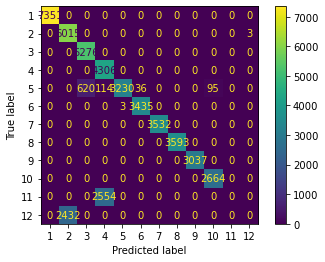

In [248]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [250]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [251]:
accuracy_score(y_test,y_pred)

0.9999792943514991

In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7351
           2       1.00      1.00      1.00      6018
           3       1.00      1.00      1.00      5276
           4       1.00      1.00      1.00      4306
           5       1.00      1.00      1.00      4095
           6       1.00      1.00      1.00      3438
           7       1.00      1.00      1.00      3532
           8       1.00      1.00      1.00      3593
           9       1.00      1.00      1.00      3037
          10       1.00      1.00      1.00      2664
          11       1.00      1.00      1.00      2554
          12       1.00      1.00      1.00      2432

    accuracy                           1.00     48296
   macro avg       1.00      1.00      1.00     48296
weighted avg       1.00      1.00      1.00     48296



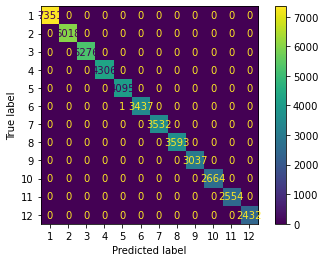

In [253]:
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

Random Forest Classifier

In [254]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [255]:
accuracy_score(y_test,y_pred)

0.9999792943514991

In [256]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7351
           2       1.00      1.00      1.00      6018
           3       1.00      1.00      1.00      5276
           4       1.00      1.00      1.00      4306
           5       1.00      1.00      1.00      4095
           6       1.00      1.00      1.00      3438
           7       1.00      1.00      1.00      3532
           8       1.00      1.00      1.00      3593
           9       1.00      1.00      1.00      3037
          10       1.00      1.00      1.00      2664
          11       1.00      1.00      1.00      2554
          12       1.00      1.00      1.00      2432

    accuracy                           1.00     48296
   macro avg       1.00      1.00      1.00     48296
weighted avg       1.00      1.00      1.00     48296



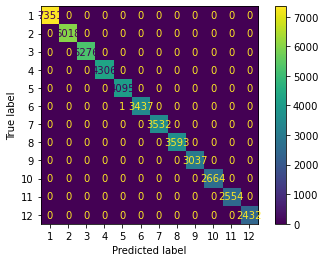

In [257]:
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

Neural Networks Part 1

In [259]:
nn_class = MLPClassifier(
                        solver='lbfgs',
                        alpha=0.001, 
                        hidden_layer_sizes=(13),
                        random_state=1,
                        max_iter=1100
                        )

nn_class.fit(X_train, y_train)
y_pred = nn_class.predict(X_test)

In [260]:
accuracy_score(y_test,y_pred)

0.1522072221301971

In [261]:
param_grid = {'solver': ['lbfgs'], 
 'max_iter': [1000,1100 ], # 1200,1300,1400,1500,1600,1700,1800,1900,2000
 'alpha': 10.0 ** -np.arange(1, 4), 
 'hidden_layer_sizes':np.arange(10, 15)
}

In [ ]:
CV_rfc = GridSearchCV(estimator=nn_class, param_grid=param_grid, cv= 5,n_jobs=-1,verbose=3)
CV_rfc.fit(X_train, y_train)
# Do not run this line of  code as this Grid search will search for the best parameters and I have already used it to find them
# This line of code took me more 6 hours to finish executing

In [ ]:
CV_rfc.best_params_
# This line of code is meant to be run after the Grid Search to display best parameters

Neural Networks Part 2

In [262]:
nn_class = MLPClassifier(
                        solver='lbfgs',
                        alpha=0.01, 
                        hidden_layer_sizes=(12),
                        random_state=1,
                        max_iter=1000
                        )

nn_class.fit(X_train, y_train)
y_pred = nn_class.predict(X_test)

In [263]:
accuracy_score(y_test,y_pred)

0.2768138148086798

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.18      1.00      0.31      7351
           2       0.71      1.00      0.83      6018
           3       0.00      0.00      0.00      5276
           4       0.00      0.00      0.00      4306
           5       0.00      0.00      0.00      4095
           6       0.00      0.00      0.00      3438
           7       0.00      0.00      0.00      3532
           8       0.00      0.00      0.00      3593
           9       0.00      0.00      0.00      3037
          10       0.00      0.00      0.00      2664
          11       0.00      0.00      0.00      2554
          12       0.00      0.00      0.00      2432

    accuracy                           0.28     48296
   macro avg       0.07      0.17      0.10     48296
weighted avg       0.12      0.28      0.15     48296



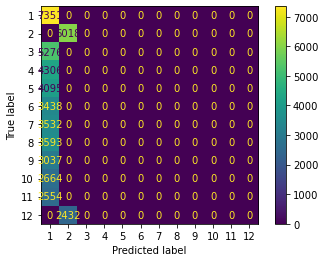

In [265]:
plot_confusion_matrix(nn_class, X_test, y_test)
plt.show()